In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline

dataset = pd.read_csv("heart.csv")

print('size of the dataset:',len(dataset))

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

1    526
0    499
Name: target, dtype: int64
Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


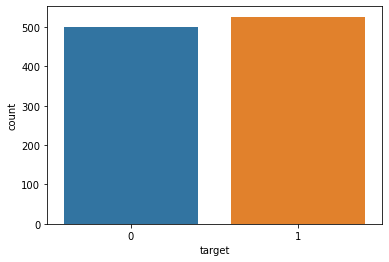

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))

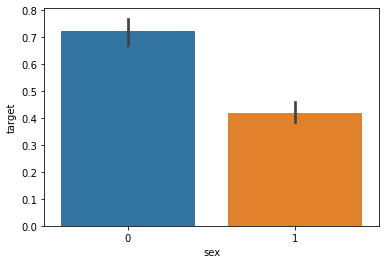

In [ ]:
dataset["sex"].unique()

sns.barplot(dataset["sex"],y)

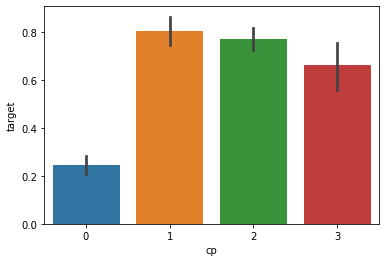

In [ ]:
dataset["cp"].unique()
sns.barplot(dataset["cp"],y)

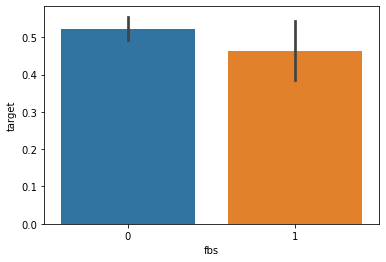

In [ ]:
dataset["fbs"].unique()
sns.barplot(dataset["fbs"],y)

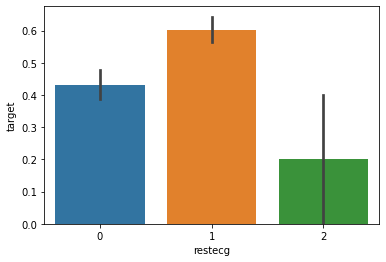

In [ ]:
dataset["restecg"].unique()
sns.barplot(dataset["restecg"],y)

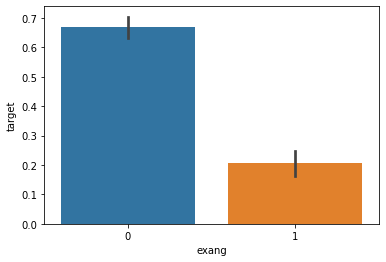

In [ ]:
dataset["exang"].unique()
sns.barplot(dataset["exang"],y)

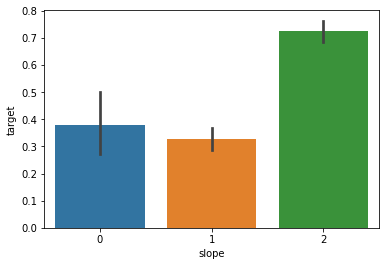

In [ ]:
dataset["slope"].unique()
sns.barplot(dataset["slope"],y)

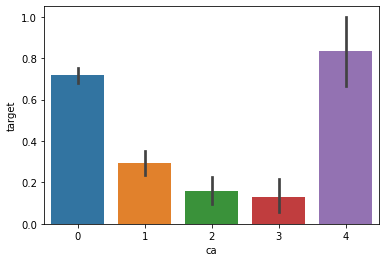

In [ ]:
dataset["ca"].unique()
sns.barplot(dataset["ca"],y)

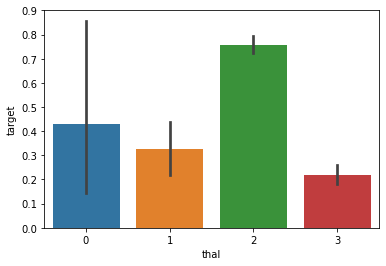

In [ ]:
dataset["thal"].unique()
sns.barplot(dataset["thal"],y)

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
488,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
342,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
921,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
785,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 86.34 %


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")


The accuracy score achieved using Decision Tree is: 100.0 %


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
Y_pred_gbc = gbc.predict(X_test)
score_gbc = round(accuracy_score(Y_pred_gbc,Y_test)*100,2)

print("The accuracy score achieved using Gradient Boosting is: "+str(score_gbc)+" %")

The accuracy score achieved using Gradient Boosting is: 99.02 %


In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_gbc]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using XGBoost is: 99.02 %


In [ ]:
import joblib

joblib.dump(lr,'heart_risk_prediction.sav')

['heart_risk_prediction.sav']

In [ ]:
final_data = pd.DataFrame({'Models' :["LR","NB","SVM","KNN","DT","XGB"],
'Accuracy' : [score_lr,score_nb,score_svm,score_knn,score_dt,score_gbc] })

In [ ]:
final_data

,Models,Accuracy
0,LR,86.34
1,NB,85.37
2,SVM,83.90
3,KNN,72.20
4,DT,100.00
5,XGB,99.02


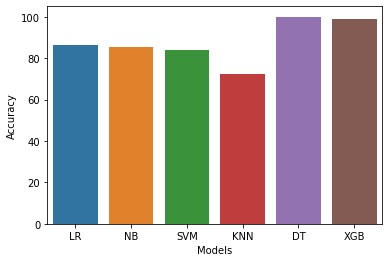

In [ ]:
sns.barplot(final_data['Models'],final_data['Accuracy'])